In [1]:
import json
import sys
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.ticker as mtick

sys.path.append("architecture/")
from NormalizedMeanSquaredError import NormalizedMeanSquaredError as NMSE
from NormalizedMeanSquaredError import NormalizedMeanSquaredError2D as NMSE2

In [4]:
def load_data(data_file_prefix):
    # Step 1. Load in the data
    data_train_u = np.load("{}_train1_u.npy".format(data_file_prefix)).astype(np.float32)
    data_train_f = np.load("{}_train1_f.npy".format(data_file_prefix)).astype(np.float32)
    data_val_u = np.load("{}_val_u.npy".format(data_file_prefix)).astype(np.float32)
    data_val_f = np.load("{}_val_f.npy".format(data_file_prefix)).astype(np.float32)
    data_test_u1 = np.load("{}_test1_u.npy".format(data_file_prefix)).astype(np.float32)
    data_test_f1 = np.load("{}_test1_f.npy".format(data_file_prefix)).astype(np.float32)
    data_test_u = np.load("{}_test2_u.npy".format(data_file_prefix)).astype(np.float32)
    data_test_f = np.load("{}_test2_f.npy".format(data_file_prefix)).astype(np.float32)
    
    val_x = [data_val_u, data_val_f]
    val_ys = [data_val_u, data_val_f, data_val_f, data_val_u]
    return val_x, val_ys
    

def analyze_experiment(expt_name, data_file_prefix):
    save_prefix = 'results/{}/'.format(expt_name)
    results_path = save_prefix + "initial_pool_results.json"
    init_results = json.load(open(results_path))
    
    # Plot the best losses vs initial learning rates from initial period
    lr = init_results['lr']
    best_loss = init_results['best_loss']
    plt.figure()
    plt.loglog(lr, best_loss, 'ok')
    plt.xlabel('learning rate')
    plt.ylabel('validation loss')
    plt.show()
    
    # Load the data:
    val_x, val_ys = load_data(data_file_prefix)

    # Load the best model
    full_model = keras.models.load_model(save_prefix + "final_model", 
                                         custom_objects={"NormalizedMeanSquaredError": NMSE})

    # Compute and print out the losses
    losses = full_model.evaluate(x=val_x, y=val_ys, batch_size=64, return_dict=True, verbose=0)
    print("LOSSES:")
    print([loss for loss in losses])
    for loss in losses:
        print(losses[loss], end=", ")
        
    # Print out the optimizer learning rate:
    print("\nLEARNING RATE:")
    lr = full_model.optimizer.get_config()['learning_rate']
    print(lr)

S1-NLSL1-Expt1-L128-a


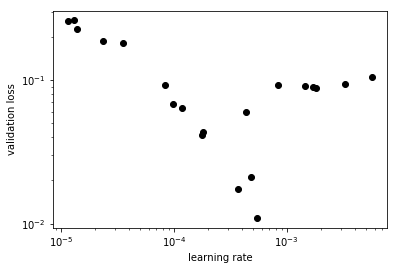

LOSSES:
['loss', 'output_1_loss', 'output_2_loss', 'output_3_loss', 'output_4_loss']
0.0007532101008109748, 1.6451458577648737e-05, 0.00013068383850622922, 0.00018644383817445487, 2.5970486603910103e-05, 
LEARNING RATE:
0.0005409360746853054
S1-NLSL1-Expt1-L128-b


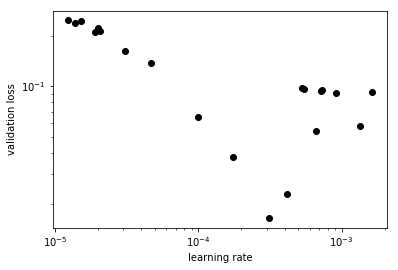

LOSSES:
['loss', 'output_1_loss', 'output_2_loss', 'output_3_loss', 'output_4_loss']
0.0008841061498969793, 2.29468187171733e-05, 0.0001386614894727245, 0.00026106220320798457, 5.994838284095749e-05, 
LEARNING RATE:
0.00030973012326285243


In [9]:
#expt_name = 'S0-NLSL1-Expt1-L20-b'
#data_file_prefix = './data/S0-Oscillator'

expt_name_prefix = 'S1-NLSL1-Expt1-L128-'
data_file_prefix = './data/S1-NLSL1'

expts = ['a', 'b']#, 'c', 'd']

for expt in expts:
    expt_name = expt_name_prefix + expt
    print(expt_name)
    analyze_experiment(expt_name, data_file_prefix)